## Addressing missing data

In [24]:
import pandas as pd
import numpy as np

In [2]:
salary = pd.read_csv('ds_salaries_clean.csv')

In [3]:
salary.isna().sum()

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64

In [4]:
threshold = len(salary) * 0.05
threshold

30.35

In [6]:
cols_to_drop = salary.columns[salary.isna().sum() <= threshold]
cols_to_drop

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')

In [7]:
salary.dropna(subset=cols_to_drop, inplace=True)

In [8]:
cols_with_missing_values = salary.columns[salary.isna().sum() > 0]
cols_with_missing_values

Index([], dtype='object')

In [9]:
for col in cols_with_missing_values[:-1]:
    salary[col].fillna(salary[col].mode()[0])

In [11]:
salary_dict = salary.groupby('Experience')['Salary_USD'].median().to_dict()
salary_dict

{'Entry': 53948.0, 'Executive': 163694.5, 'Mid': 73465.0, 'Senior': 129380.0}

In [12]:
salary['Salary_USD'] = salary['Salary_USD'].fillna(salary['Experience'].map(salary_dict))

## Converting and analyzing categorical data

In [13]:
## filter non numeric data
salary.select_dtypes('object').head()

,Designation,Experience,Employment_Status,Employee_Location,Company_Size
0,Data Scientist,Mid,FT,DE,L
1,Machine Learning Scientist,Senior,FT,JP,S
2,Big Data Engineer,Senior,FT,GB,M
3,Product Data Analyst,Mid,FT,HN,S
4,Machine Learning Engineer,Senior,FT,US,L


In [14]:
salary['Designation'].value_counts()

Designation
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                

In [15]:
## count unique job title
salary['Designation'].nunique()

50

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

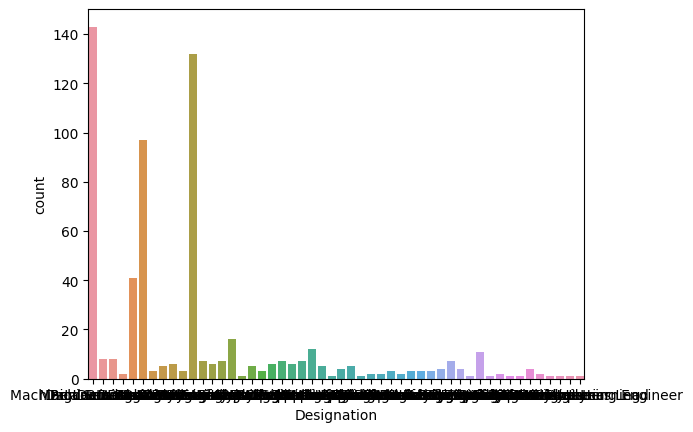

In [29]:
sns.countplot(data=salary,x='Designation')
plt.show()

In [21]:
## Extracting values from categories
salary['Designation'].str.contains('Scientist')

0       True
1       True
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [22]:
## Finding multiple phrases in strings
salary['Designation'].str.contains('Machine Learning|AI')

0      False
1       True
2      False
3      False
4       True
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [23]:
## word of interest any that start with data
salary['Designation'].str.contains('^Data')

0       True
1      False
2      False
3      False
4      False
       ...  
602     True
603     True
604     True
605     True
606    False
Name: Designation, Length: 607, dtype: bool

In [25]:
job_categories = [
    'Data Science','Data Analytics','Data Engineering',
    'Machine Learning','Managerial','Consultant'
]

data_science = 'Data Scientist|NLP'
data_analyst = 'Analyst|Analytics'
data_engineer = 'Data Engineer|ETL|Architect|Infrastructure|Big Data'
ml_engineer = 'Machine Learning|ML|AI'
manager = 'Manager|Head|Director|Lead|Principal|Staff'
constulant = 'Consultant|Freelance'

conditions = [
    (salary['Designation'].str.contains(data_science)),
    (salary['Designation'].str.contains(data_analyst)),
    (salary['Designation'].str.contains(data_engineer)),
    (salary['Designation'].str.contains(ml_engineer)),
    (salary['Designation'].str.contains(manager)),
    (salary['Designation'].str.contains(constulant))
]

salary['Job_Category'] = np.select(conditions,
                                   job_categories,
                                   default='Other')

salary[['Designation','Job_Category']]

,Designation,Job_Category
0,Data Scientist,Data Science
1,Machine Learning Scientist,Machine Learning
2,Big Data Engineer,Data Engineering
3,Product Data Analyst,Data Analytics
4,Machine Learning Engineer,Machine Learning
...,...,...
602,Data Engineer,Data Engineering
603,Data Engineer,Data Engineering
604,Data Analyst,Data Analytics
605,Data Analyst,Data Analytics


<Axes: xlabel='Job_Category', ylabel='count'>

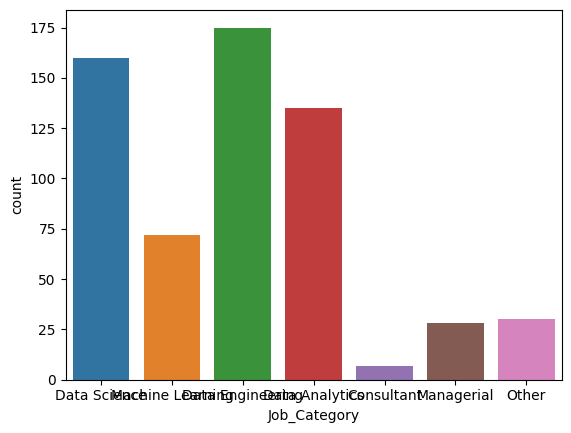

In [26]:
sns.countplot(data=salary,x='Job_Category')

In [28]:
salary.value_counts('Job_Category')

Job_Category
Data Engineering    175
Data Science        160
Data Analytics      135
Machine Learning     72
Other                30
Managerial           28
Consultant            7
Name: count, dtype: int64

## Working with Numerical data

In [32]:
salary.dtypes

Working_Year              int64
Designation              object
Experience               object
Employment_Status        object
Employee_Location        object
Company_Size             object
Remote_Working_Ratio      int64
Salary_USD              float64
Job_Category             object
dtype: object

In [33]:
salary['Salary_Rupees'] = salary['Salary_USD'] * 83.74
salary['Salary_Rupees']

0       6383248.98
1      20789041.18
2       8717334.00
3       1599182.78
4      11993661.50
          ...     
602    12313464.56
603    10074675.66
604    10314590.76
605    11993661.50
606    15991576.58
Name: Salary_Rupees, Length: 607, dtype: float64

In [35]:
salary.groupby('Company_Size')['Salary_USD'].mean()

Company_Size
L    113857.282828
M    111625.328221
S     74126.313253
Name: Salary_USD, dtype: float64

In [38]:
salary['std_dev'] = salary.groupby('Experience')['Salary_USD'].transform(lambda x: x.std())
salary[['Experience','std_dev']].value_counts()

Experience  std_dev      
Senior      55086.264071     280
Mid         61014.876754     213
Entry       42390.355189      88
Executive   111783.576779     26
Name: count, dtype: int64

In [39]:
salary['median_by_comp_size'] = salary.groupby('Company_Size')['Salary_USD'].transform(lambda x : x.median())

In [42]:
salary[['Company_Size','median_by_comp_size']].head()

,Company_Size,median_by_comp_size
0,L,95483.0
1,S,62064.0
2,M,108076.0
3,S,62064.0
4,L,95483.0


## Handeling Outlier

In [44]:
salary['Salary_USD'].describe()

count       607.000000
mean     107225.836903
std       67752.393254
min        2730.000000
25%       59893.000000
50%       96982.000000
75%      143225.000000
max      572900.000000
Name: Salary_USD, dtype: float64

In [46]:
## IQR = 75 - 25 percentile 
## upper outlier > 75 percentile + (1.5 * IQR)
## Lower outlier < 25 percentile - (1.5 * IQR)

## 75th percentile
seventy_fifth = salary['Salary_USD'].quantile(0.75)

## 25th percentile
twenthy_fifth = salary['Salary_USD'].quantile(0.25)

## Interquatile range
salaries_iqr = seventy_fifth - twenthy_fifth

salaries_iqr

83332.0

In [47]:
## upper threshold
upper = seventy_fifth + (1.5 * salaries_iqr)

## lower threshold 
lower = twenthy_fifth - (1.5 * salaries_iqr)

upper,lower

(268223.0, -65105.0)

In [49]:
salary[(salary['Salary_USD']<  lower) | (salary['Salary_USD'] > upper)][['Experience','Employee_Location','Salary_USD']]

,Experience,Employee_Location,Salary_USD
25,Executive,US,310321.0
33,Mid,US,429675.0
63,Senior,US,393392.0
97,Mid,US,429675.0
157,Mid,US,403895.0
225,Executive,US,397211.0
252,Executive,US,572900.0
482,Executive,US,309366.0
519,Senior,US,362837.0
523,Senior,US,386708.0


In [51]:
no_outliers = salary[(salary['Salary_USD'] < upper) | (salary['Salary_USD'] > lower)]
no_outliers['Salary_USD'].describe()

count       607.000000
mean     107225.836903
std       67752.393254
min        2730.000000
25%       59893.000000
50%       96982.000000
75%      143225.000000
max      572900.000000
Name: Salary_USD, dtype: float64

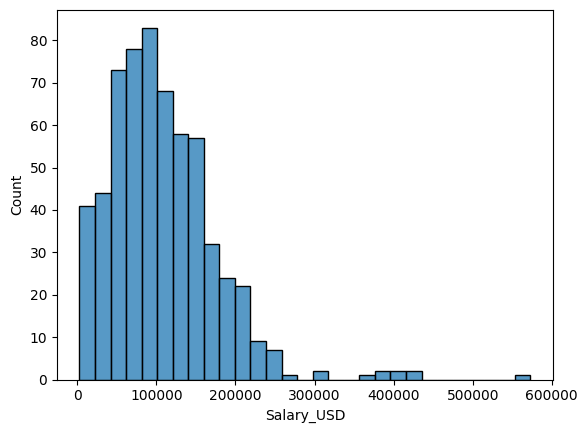

In [52]:
sns.histplot(data=salary,x='Salary_USD')
plt.show()

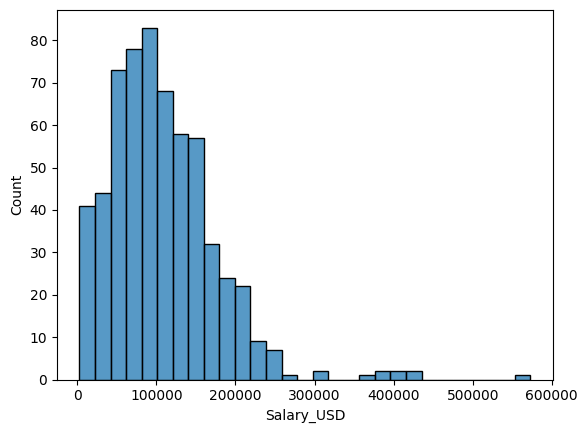

In [53]:
sns.histplot(data=no_outliers,x='Salary_USD')
plt.show()